In [1]:
#geo_env
#compute inputs for wind turbines
import csv
import numpy as np
import xarray as xr
import sys

sys.path.append('./Tools')
from WindTurbineTools import WindToEnergy, GetTurbineData, FilterOnDepthShoreDistance, GetCostAndGenerationWindTurbine, FilterForWTKDataset, FilterForBOEM
from GeneralGeoTools import PlotGeneralGeoData, PlotGeneralGeoData_Class, GetTimeList, ChangeTimeSpaceResolution, PlotsWithBOEM

from datetime import datetime, timedelta

#Turbines available:
#Haliade150_6MW
#ATB_8MW_2020_Vestas
#ATB_12MW_2030
#ATB_15MW_2030
#ATB_18MW_2030

InputDataPath="./InputData"
GeoDataPath=InputDataPath+"/CoastLine/"
WindTurbine="ATB_15MW_2030" #Name of the wind turbine file

WindCostPath=InputDataPath+"/Wind/CostWindTurbines.xlsx"

WindSpeedHeightsAvailable={"100":"windspeed_100m.npz",
                           "140":"windspeed_140m.npz",
                           "160":"windspeed_160m.npz"}

In [ ]:
#Cost and generation for all sites and turbines
WindEnergy_pu, RatedPower, LatLong, WS_Hub, Depth, DistanceShore, TRG_site, CAPEX_site, OPEX_site, AnnualizedCost, TimeList,_=GetCostAndGenerationWindTurbine(InputDataPath, WindCostPath, "ATB_8MW_2020_Vestas", WindSpeedHeightsAvailable, SavePath="./OutputData/Wind/GenCost_ATB_8MW_2020_Vestas.npz") 
WindEnergy_pu, RatedPower, LatLong, WS_Hub, Depth, DistanceShore, TRG_site, CAPEX_site, OPEX_site, AnnualizedCost, TimeList,_=GetCostAndGenerationWindTurbine(InputDataPath, WindCostPath, "ATB_12MW_2030", WindSpeedHeightsAvailable, SavePath="./OutputData/Wind/GenCost_ATB_12MW_2030.npz") 
WindEnergy_pu, RatedPower, LatLong, WS_Hub, Depth, DistanceShore, TRG_site, CAPEX_site, OPEX_site, AnnualizedCost, TimeList,_=GetCostAndGenerationWindTurbine(InputDataPath, WindCostPath, "ATB_15MW_2030", WindSpeedHeightsAvailable, SavePath="./OutputData/Wind/GenCost_ATB_15MW_2030.npz") 
WindEnergy_pu, RatedPower, LatLong, WS_Hub, Depth, DistanceShore, TRG_site, CAPEX_site, OPEX_site, AnnualizedCost, TimeList,_=GetCostAndGenerationWindTurbine(InputDataPath, WindCostPath, "ATB_18MW_2030", WindSpeedHeightsAvailable, SavePath="./OutputData/Wind/GenCost_ATB_18MW_2030.npz") 


 Calculating water depth at each point


100%|██████████| 1992/1992 [00:19<00:00, 100.39it/s]



 Calculating distance to shore for viable site locations


100%|██████████| 996/996 [00:18<00:00, 54.21it/s]


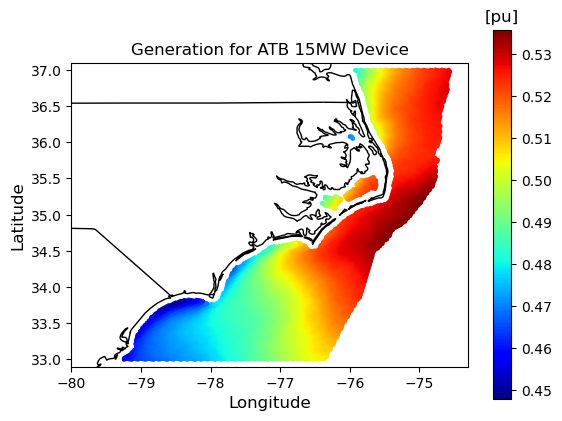

In [2]:
#Get ONLY wind generation in pu for all site locations in the .npz files
WindEnergy_pu, RatedPower, LatLong, WS_Hub, Depth, DistanceShore, TimeList=WindToEnergy(InputDataPath, WindTurbine, WindSpeedHeightsAvailable, SavePath=None) 
PlotGeneralGeoData(LatLong, np.mean(WindEnergy_pu,axis=0), GeoDataPath, ColorBarTitle="[pu]", Title="Generation for ATB 15MW Device", SavePath=None, s=6, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))

In [92]:
#Get generation and cost (filtered for sites where cost can be estimated)
WindTurbine="ATB_15MW_2030" #Name of the wind turbine file
WindEnergy_pu, RatedPower, LatLong, WS_Hub, Depth, DistanceShore, TRG_site, CAPEX_site, OPEX_site, AnnualizedCost, TimeList,_=GetCostAndGenerationWindTurbine(InputDataPath, WindCostPath, WindTurbine, WindSpeedHeightsAvailable, SavePath=None) 


 Calculating water depth at each point


100%|██████████| 1992/1992 [00:19<00:00, 100.01it/s]



 Calculating distance to shore for viable site locations


100%|██████████| 996/996 [00:18<00:00, 53.34it/s]


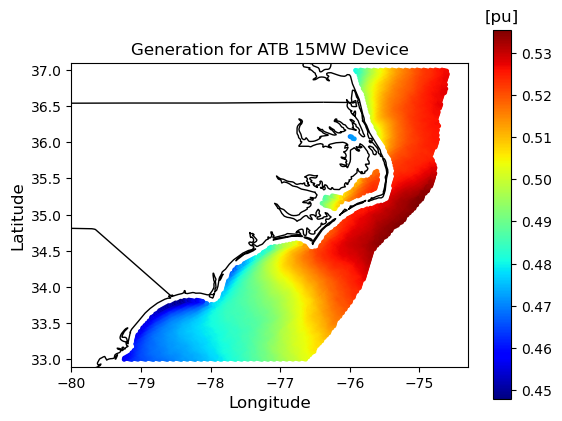

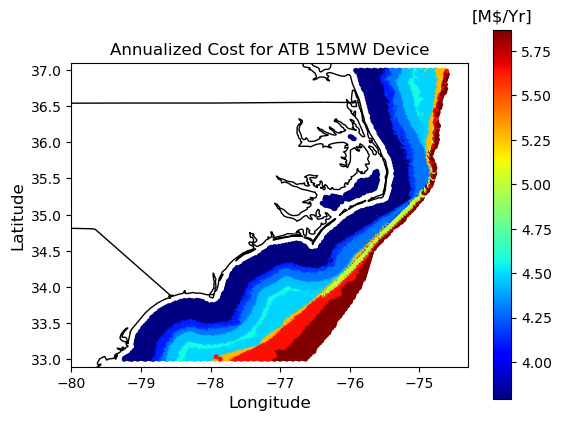

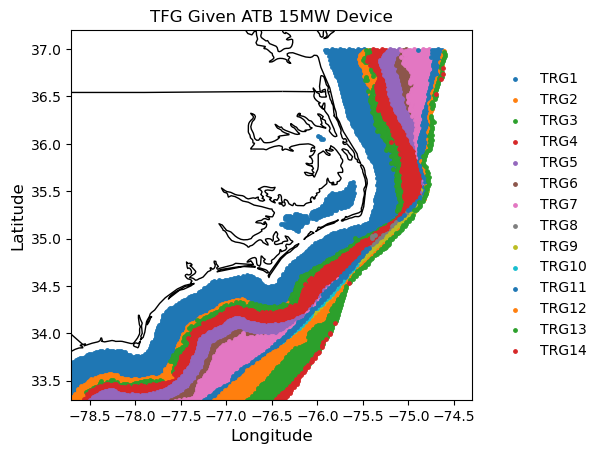

In [5]:
PlotGeneralGeoData(LatLong, np.mean(WindEnergy_pu,axis=0), GeoDataPath, ColorBarTitle="[pu]", Title="Generation for ATB 15MW Device", SavePath=None, s=6, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
PlotGeneralGeoData(LatLong, AnnualizedCost, GeoDataPath, ColorBarTitle="[M$/Yr]", Title="Annualized Cost for ATB 15MW Device", SavePath=None, s=6, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
PlotGeneralGeoData_Class(LatLong, TRG_site, GeoDataPath, Title="TFG Given ATB 15MW Device", SavePath=None, s=6, LatMaxMin=(33.3, 37.2), LongMaxMin=(-78.7, -74.3))

# Data after filtering or scaling

In [6]:
CurrentTimeResolution=1 #in hours
NewTimeResolution=24 #24hour time discretization
StepsPerDegree=10 #New grid resolution 1/StepsPerDegree

StartDateTime=datetime(2007, 1, 1, 0, 0)
EndDateTime=datetime(2013, 12, 30, 0) #Wind goes up to datetime(2013, 12, 31, 23)

file_list=["GenCost_ATB_8MW_2020_Vestas","GenCost_ATB_12MW_2030","GenCost_ATB_15MW_2030", "GenCost_ATB_18MW_2030"]
for file in file_list:
    ReferenceDataPath="./OutputData/Wind/"+ file +".npz"
    NewSavePath="./OutputData/Wind/Upscale24h_0.1Degree_"+ file +".npz"
    _, _, _, _, _, _, _, _, _, _=ChangeTimeSpaceResolution (ReferenceDataPath, CurrentTimeResolution, NewTimeResolution, StepsPerDegree, StartDateTime, EndDateTime, NewSavePath=NewSavePath)


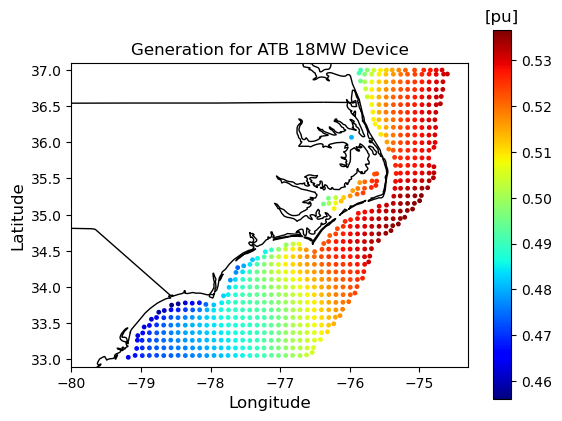

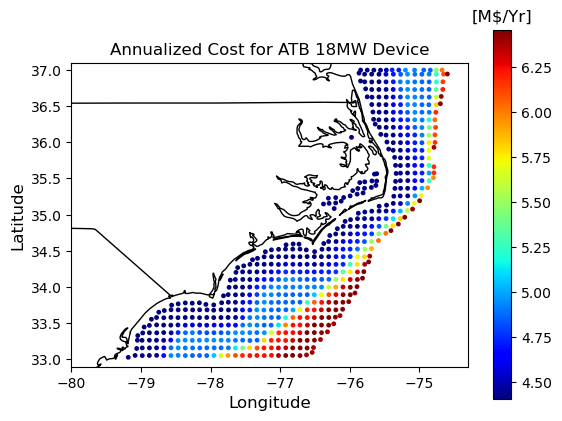

In [7]:
DataPath="./OutputData/Wind/Upscale24h_0.1Degree_GenCost_ATB_18MW_2030.npz"
Data=np.load(DataPath, allow_pickle=True)
LatLong=Data["LatLong"]
Energy_pu=Data["Energy_pu"]
AnnualizedCost=Data["AnnualizedCost"]


PlotGeneralGeoData(LatLong, np.mean(Energy_pu,axis=0), GeoDataPath, ColorBarTitle="[pu]", Title="Generation for ATB 18MW Device", SavePath=None, s=6, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
PlotGeneralGeoData(LatLong, AnnualizedCost, GeoDataPath, ColorBarTitle="[M$/Yr]", Title="Annualized Cost for ATB 18MW Device", SavePath=None, s=6, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))



# Filter For WTK

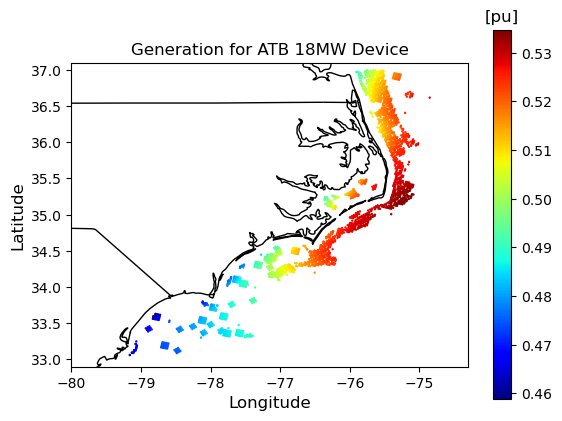

In [76]:
#WTK Filtering
WTKPath="InputData/Wind/wtk_site_metadata.csv"
ReferenceDataPath="./OutputData/Wind/"+ "GenCost_ATB_18MW_2030" +".npz"
DataDir=FilterForWTKDataset(ReferenceDataPath, WTKPath)

LatLong=DataDir["LatLong"]
Energy_pu=DataDir["Energy_pu"]
PlotGeneralGeoData(LatLong, np.mean(Energy_pu,axis=0), GeoDataPath, ColorBarTitle="[pu]", Title="Generation for ATB 18MW Device", SavePath=None, s=0.5, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))

In [9]:
file_list=["GenCost_ATB_8MW_2020_Vestas","GenCost_ATB_12MW_2030","GenCost_ATB_15MW_2030", "GenCost_ATB_18MW_2030"]
for file in file_list:
    WTKPath="InputData/Wind/wtk_site_metadata.csv"
    ReferenceDataPath="./OutputData/Wind/"+ file+".npz"
    SavePath="./OutputData/Wind/WTK_"+ file +".npz"
    DataDir=FilterForWTKDataset(ReferenceDataPath, WTKPath, SavePath)

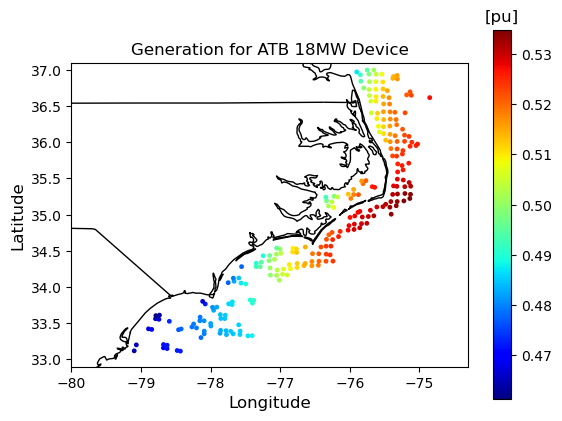

In [10]:
#Filter for WTK dataset and change time resolution after

CurrentTimeResolution=1 #in hours
NewTimeResolution=24 #24hour time discretization
StepsPerDegree=10 #New grid resolution 1/StepsPerDegree

StartDateTime=datetime(2007, 1, 1, 0, 0)
EndDateTime=datetime(2012, 12, 30, 0) #Wind goes up to datetime(2013, 12, 31, 23)

ReferenceDataPath="./OutputData/Wind/WTK_"+ "GenCost_ATB_18MW_2030" +".npz"
NewEnergy_Pu_TimeSpace, NewTimeList, NewRawResource_TimeSpace, NewLatLong, NewDepth, NewDistanceShore, NewCAPEX_site, NewOPEX_site, NewAnnualizedCost, NumberOfCellsPerSite=ChangeTimeSpaceResolution (ReferenceDataPath, CurrentTimeResolution, NewTimeResolution, StepsPerDegree, StartDateTime, EndDateTime)
PlotGeneralGeoData(NewLatLong, np.mean(NewEnergy_Pu_TimeSpace,axis=0), GeoDataPath, ColorBarTitle="[pu]", Title="Generation for ATB 18MW Device", SavePath=None, s=6, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))

# Filter for BOEM

Filtering sites in lease/planning areas


100%|██████████| 13800/13800 [00:01<00:00, 6928.36it/s]


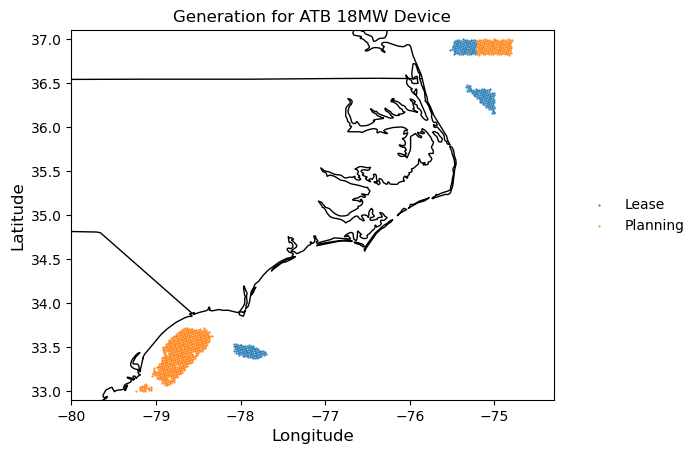

In [2]:
PathBOEMData="./InputData/Wind/BOEM_Renewable_Energy_Shapefiles/"
BOEM_ShpDir={"Wind Lease Areas":"BOEM_Wind_Leases_2_2023_carto_upgrade.shp",
            "Wind Planning Areas": "BOEM_Wind_Planning_Areas_8_2023_update.shp"}

ReferenceDataPath="./OutputData/Wind/GenCost_ATB_18MW_2030.npz"

DataDir=FilterForBOEM(ReferenceDataPath, PathBOEMData, BOEM_ShpDir, SavePath=None)
PlotGeneralGeoData_Class(DataDir["LatLong"], DataDir["Code_BOEM"], GeoDataPath, Title="Generation for ATB 18MW Device", SavePath=None, s=0.5, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))

In [3]:
PathBOEMData="./InputData/Wind/BOEM_Renewable_Energy_Shapefiles/"
BOEM_ShpDir={"Wind Lease Areas":"BOEM_Wind_Leases_2_2023_carto_upgrade.shp",
            "Wind Planning Areas": "BOEM_Wind_Planning_Areas_8_2023_update.shp"}

DataDir=FilterForBOEM(ReferenceDataPath, PathBOEMData, BOEM_ShpDir, SavePath=None)

file_list=["GenCost_ATB_8MW_2020_Vestas","GenCost_ATB_12MW_2030","GenCost_ATB_15MW_2030", "GenCost_ATB_18MW_2030"]
for file in file_list:
    WTKPath="InputData/Wind/wtk_site_metadata.csv"
    ReferenceDataPath="./OutputData/Wind/"+ file+".npz"
    SavePath="./OutputData/Wind/BOEM_"+ file +".npz"
    DataDir=FilterForBOEM(ReferenceDataPath, PathBOEMData, BOEM_ShpDir, SavePath=SavePath)

Filtering sites in lease/planning areas


100%|██████████| 13800/13800 [00:01<00:00, 6963.36it/s]


Filtering sites in lease/planning areas


100%|██████████| 13800/13800 [00:01<00:00, 6931.85it/s]


Filtering sites in lease/planning areas


100%|██████████| 13800/13800 [00:01<00:00, 6928.36it/s]


Filtering sites in lease/planning areas


100%|██████████| 13800/13800 [00:01<00:00, 6949.31it/s]


Filtering sites in lease/planning areas


100%|██████████| 13800/13800 [00:02<00:00, 6876.53it/s]


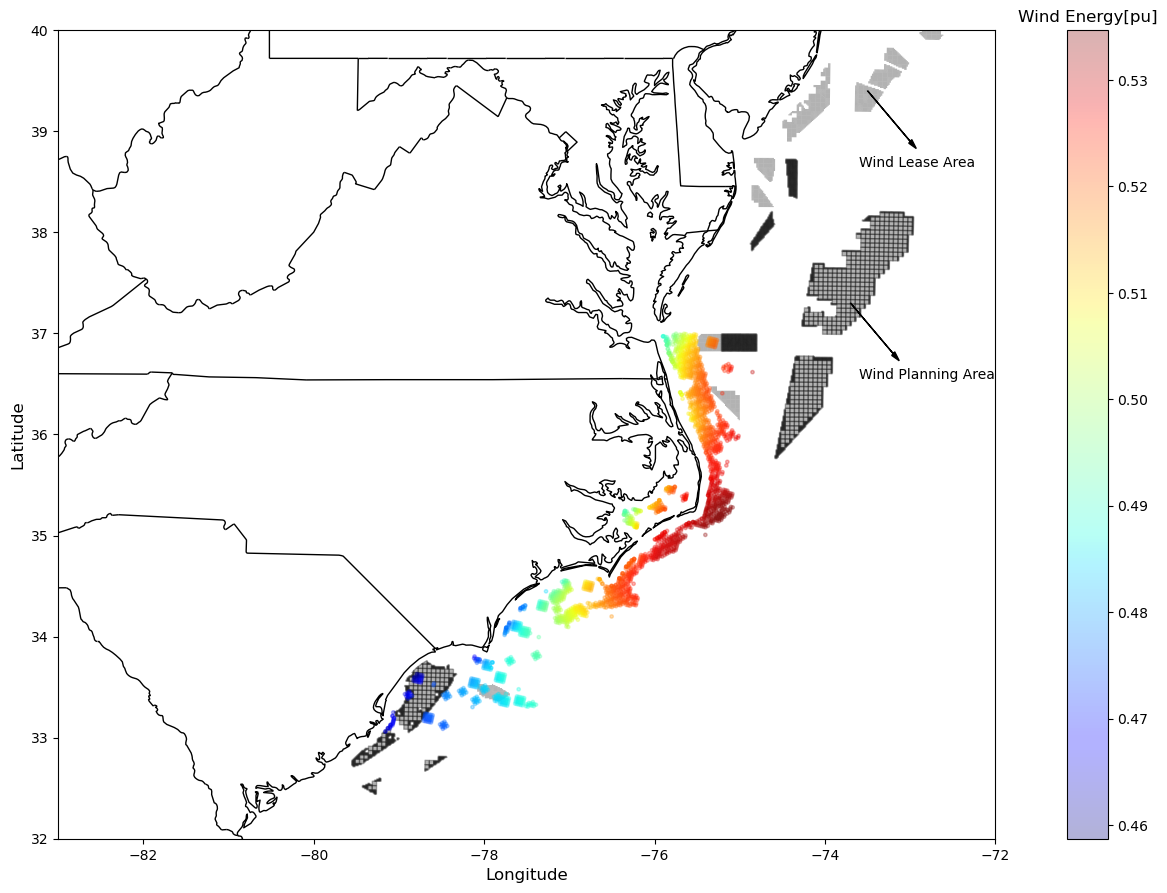

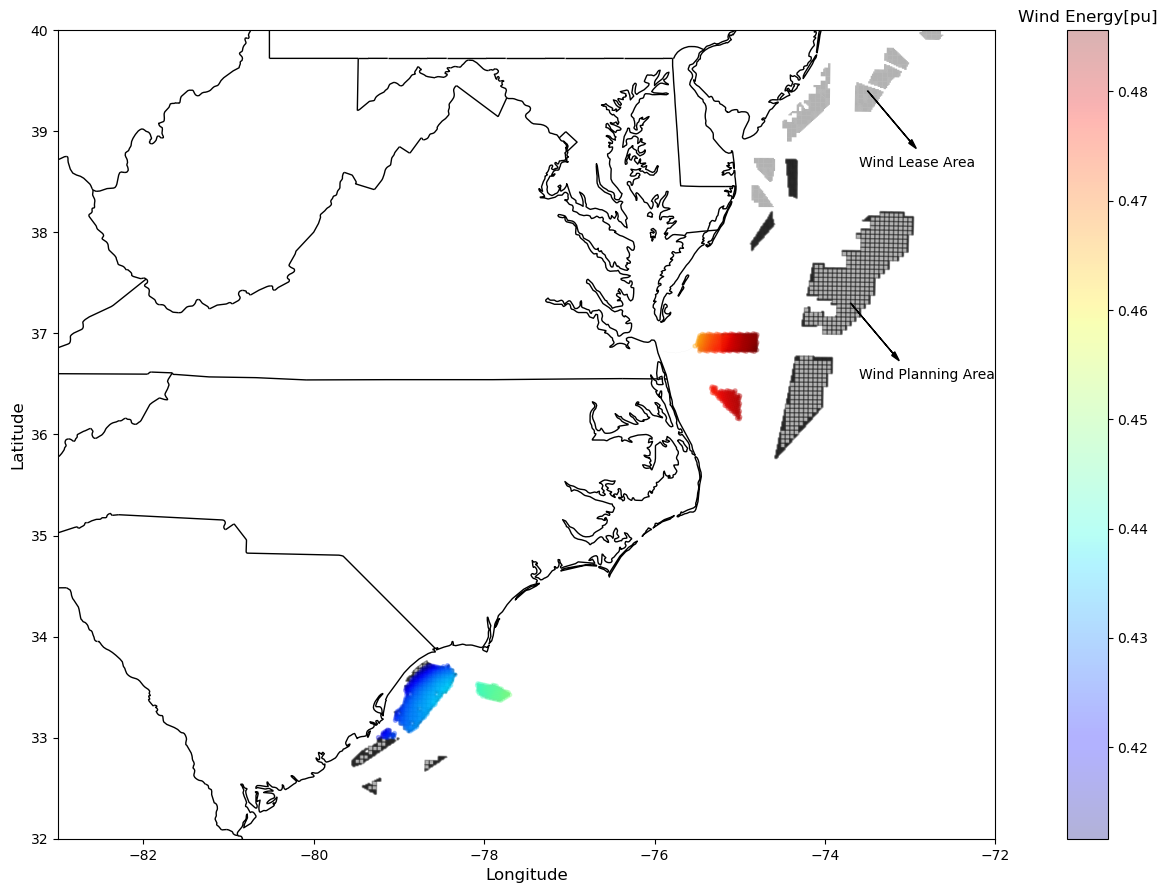

In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


GeoDataPath=InputDataPath+"/CoastLine/"

PathBOEMData="./InputData/Wind/BOEM_Renewable_Energy_Shapefiles/"
BOEM_ShpDir={"Wind Lease Areas":"BOEM_Wind_Leases_2_2023_carto_upgrade.shp",
            "Wind Planning Areas": "BOEM_Wind_Planning_Areas_8_2023_update.shp"}

LongMaxMin=(-83,-72)
LatMaxMin=(32,40)

Title=None
ColorBarTitle1=None
ColorBarTitle2=None

ReferenceDataPath="./OutputData/Wind/WTK_"+ "GenCost_ATB_18MW_2030" +".npz"
Data=np.load(ReferenceDataPath, allow_pickle=True)
LatLong1=Data["LatLong"]
Y_Variable1=np.mean(Data["Energy_pu"],axis=0)

ReferenceDataPath="./OutputData/Wind/BOEM_"+ "GenCost_ATB_18MW_2030" +".npz"
Data=np.load(ReferenceDataPath, allow_pickle=True)
LatLong2=Data["LatLong"]
Y_Variable2=np.mean(Data["Energy_pu"],axis=0)

PlotsWithBOEM(GeoDataPath, PathBOEMData, BOEM_ShpDir, LatLong1, Y_Variable1, ColorBarTitle1="Wind Energy[pu]",SavePath="./OutputData/Plots/Wind/SampleWTK_BOEM_18MW_PU.png", s=6, LongMaxMin=(-83,-72), LatMaxMin=(32,40))
PlotsWithBOEM(GeoDataPath, PathBOEMData, BOEM_ShpDir, LatLong2, Y_Variable2, ColorBarTitle1="Wind Energy[pu]",SavePath="./OutputData/Plots/Wind/SampleBOEM_BOEM_18MW_PU.png", s=8, LongMaxMin=(-83,-72), LatMaxMin=(32,40))


# Saving Plots

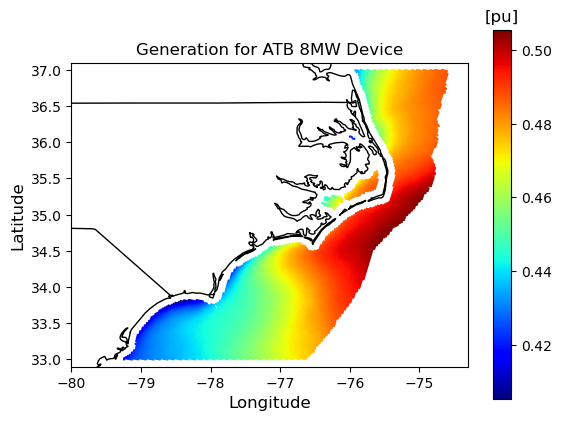

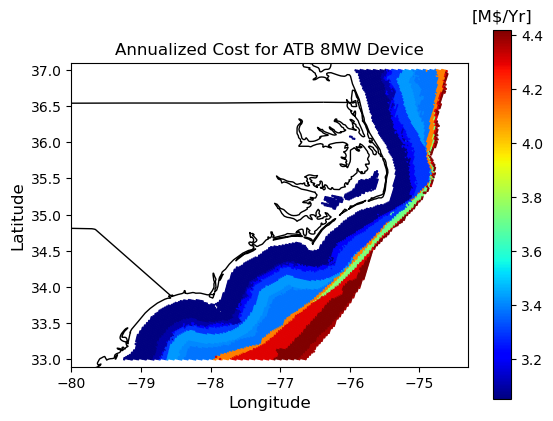

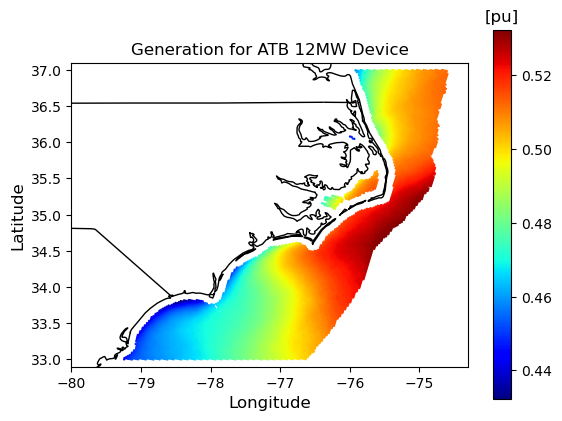

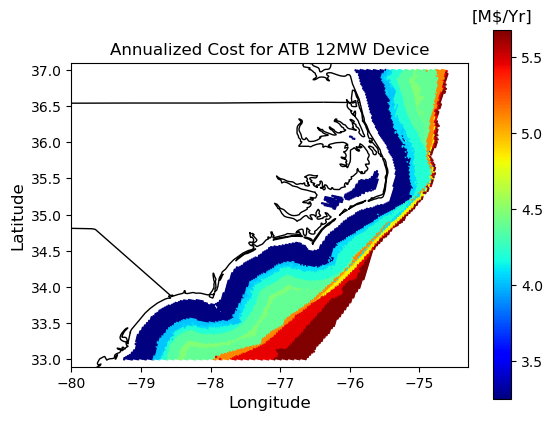

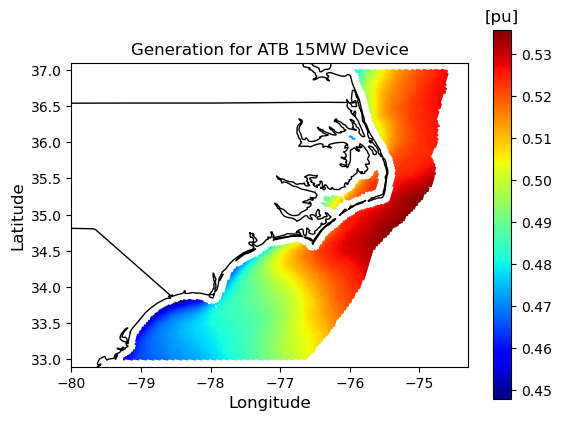

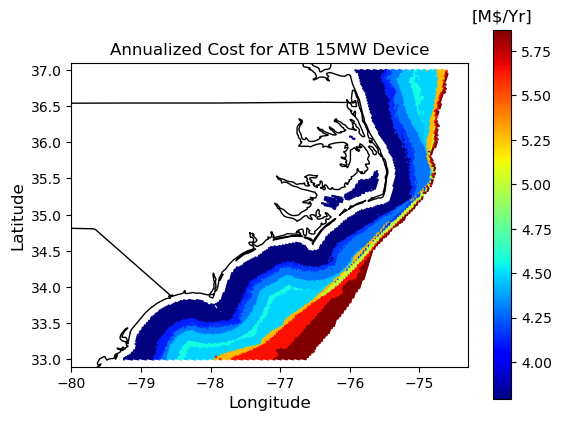

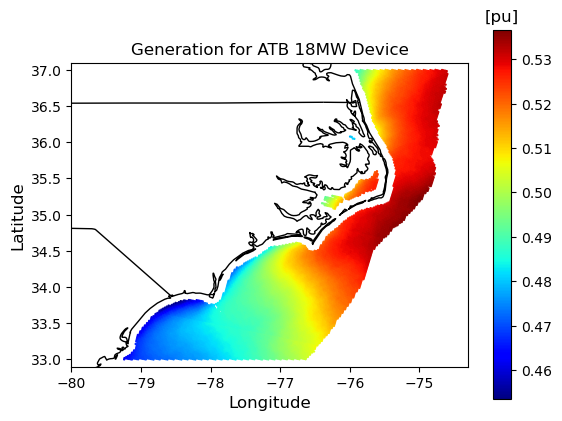

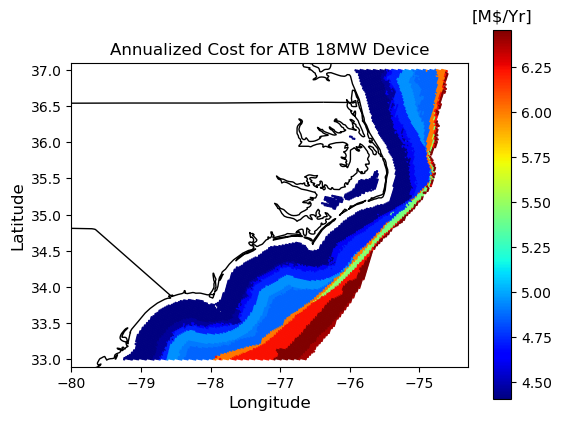

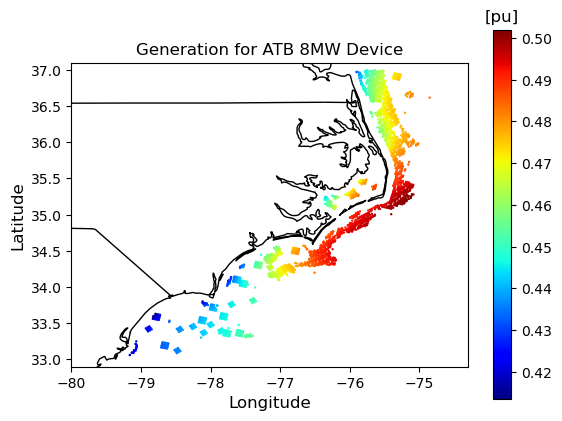

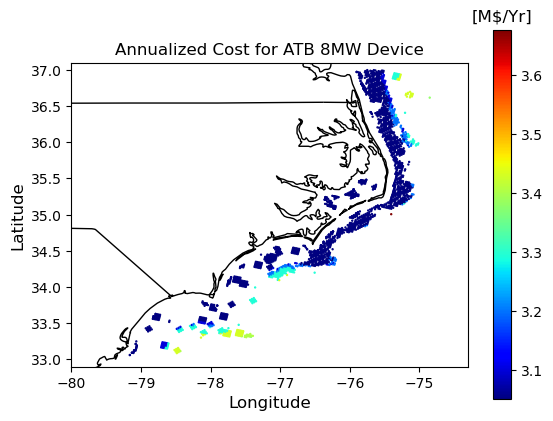

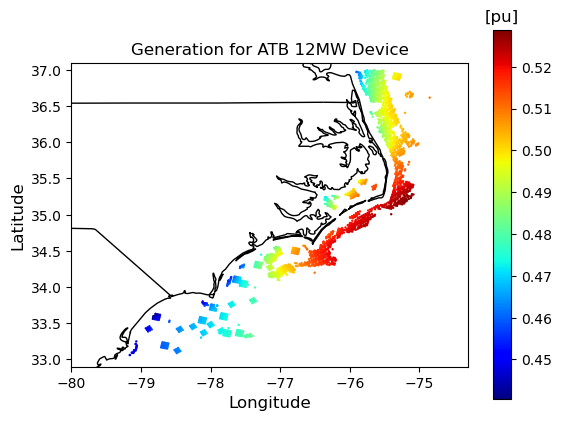

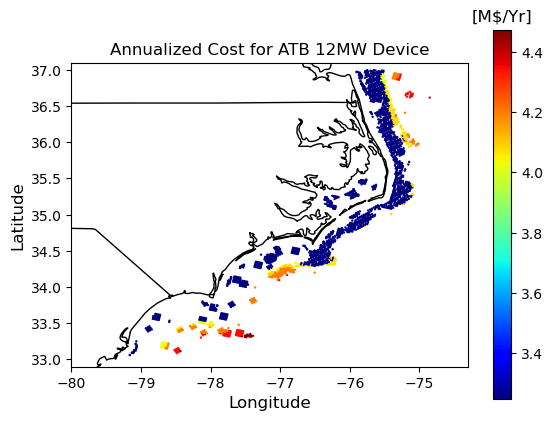

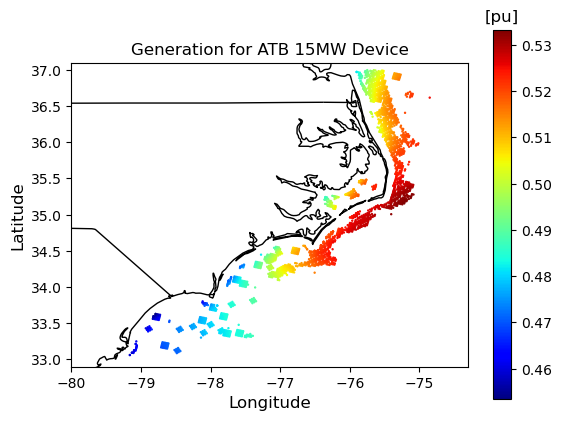

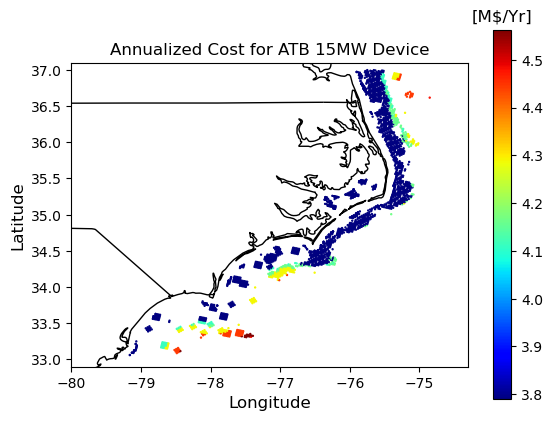

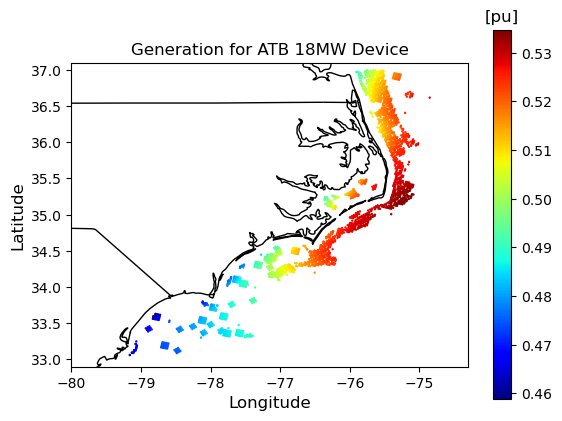

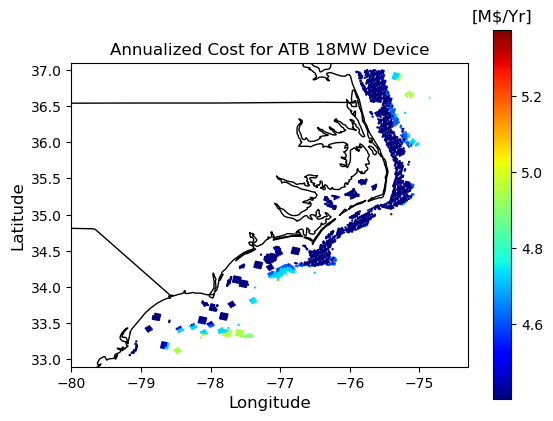

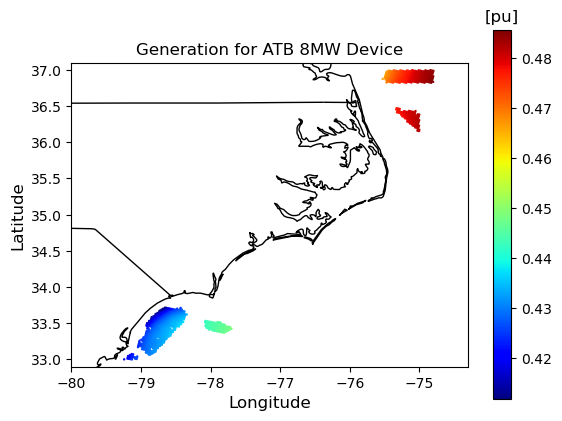

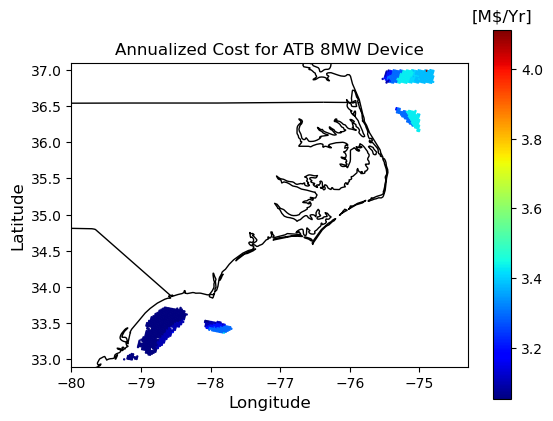

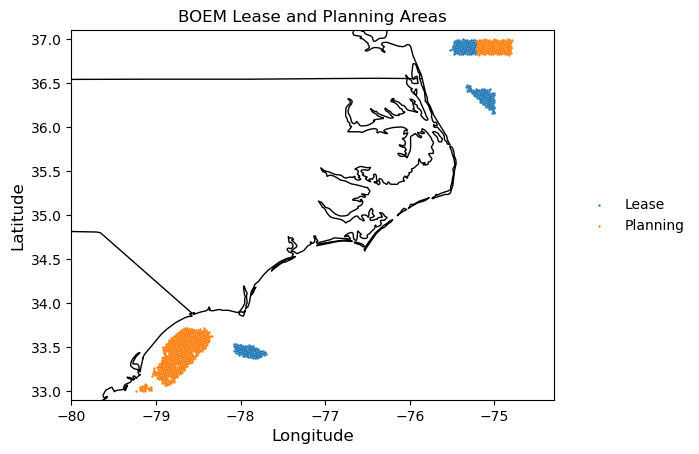

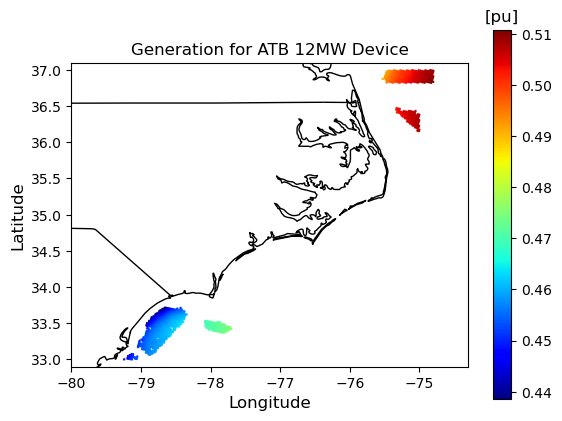

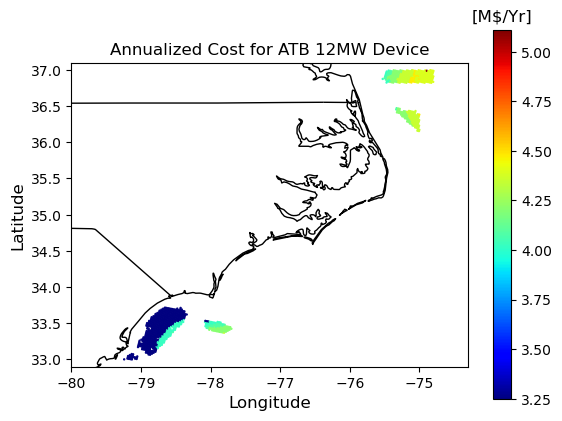

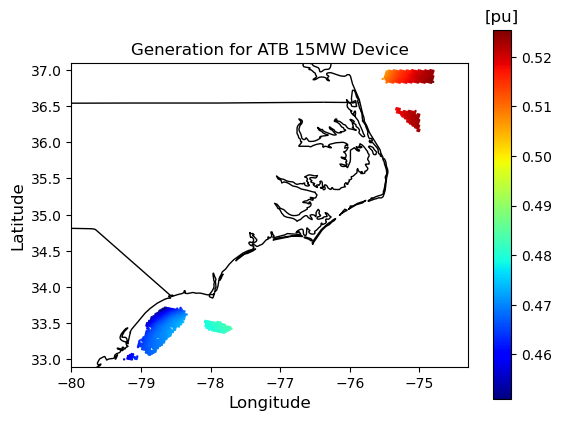

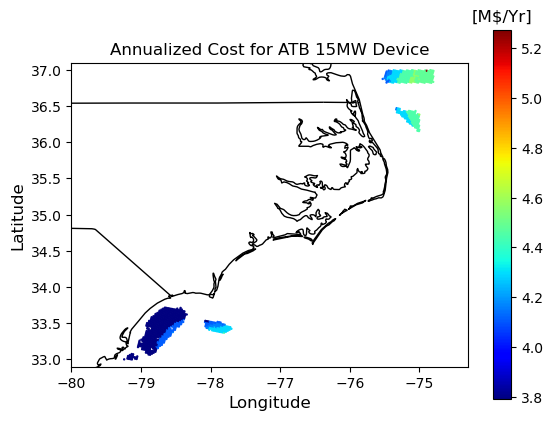

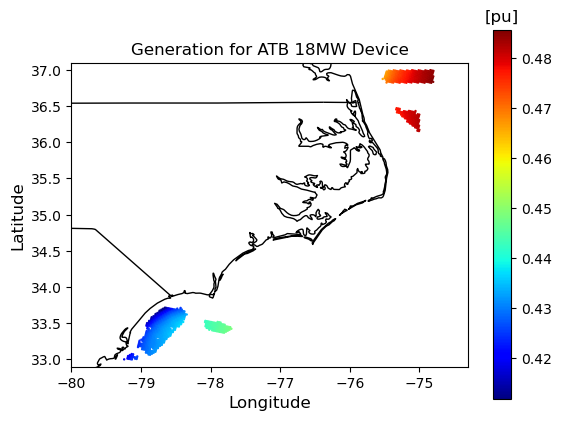

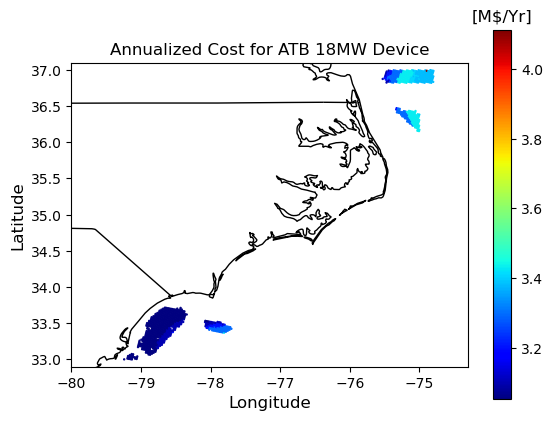

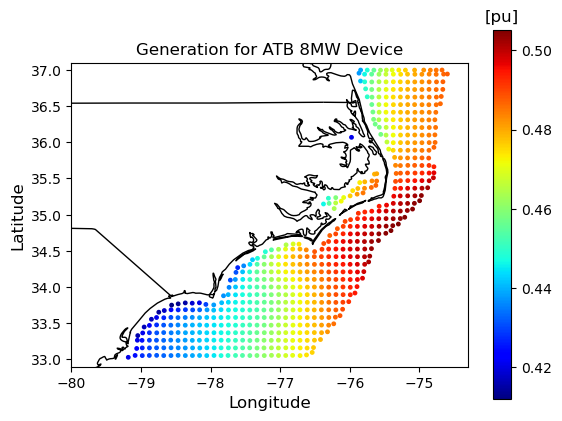

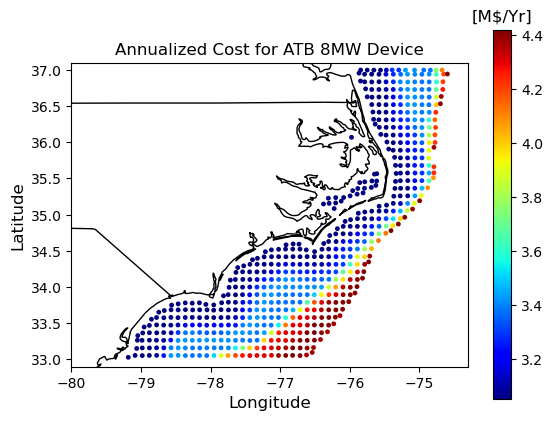

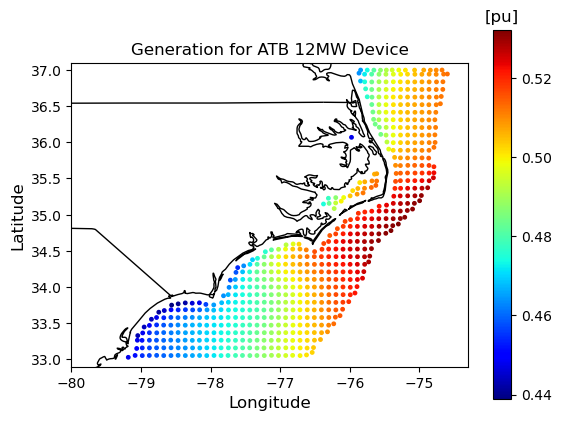

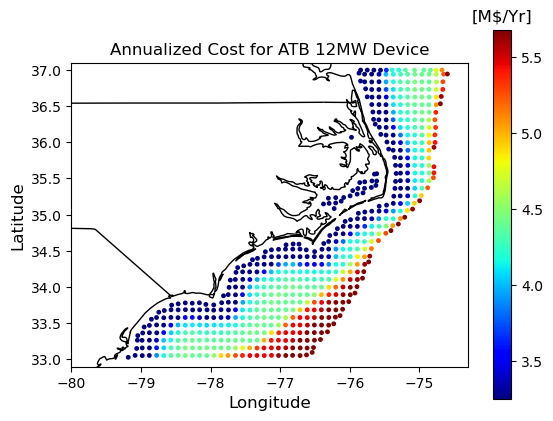

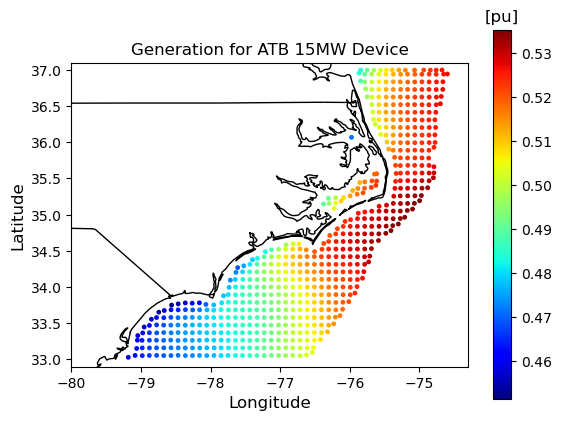

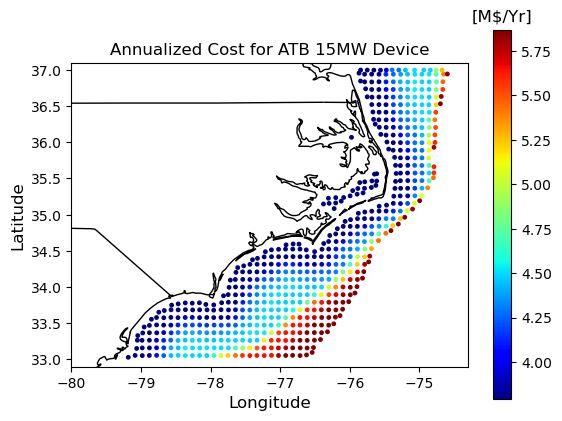

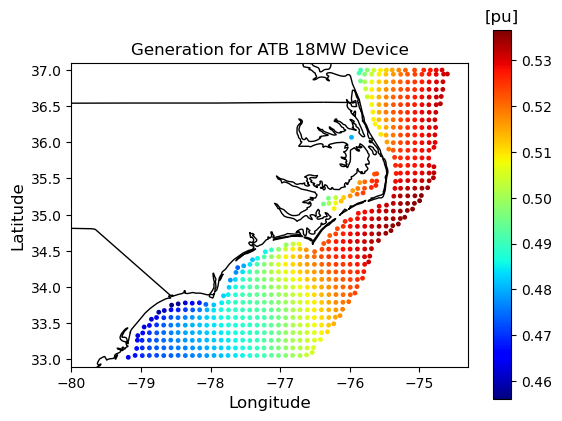

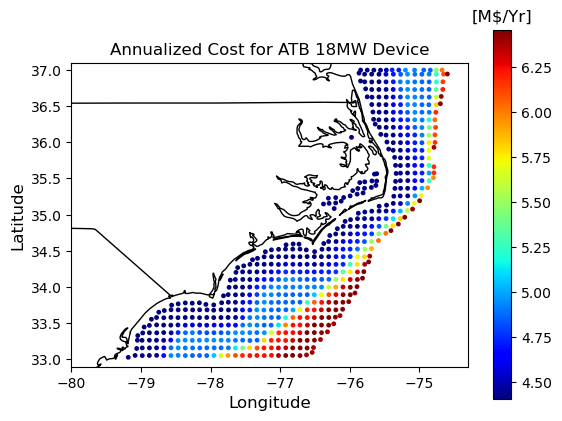

In [7]:
file_list=["GenCost_ATB_8MW_2020_Vestas","GenCost_ATB_12MW_2030","GenCost_ATB_15MW_2030", "GenCost_ATB_18MW_2030"]
Title_list=["ATB 8MW Device", "ATB 12MW Device", "ATB 15MW Device", "ATB 18MW Device"]

for i in range(len(file_list)):
    file=file_list[i]
    ReferenceDataPath="./OutputData/Wind/"+ file+".npz"
    
    Data=np.load(ReferenceDataPath, allow_pickle=True)
    LatLong=Data["LatLong"]
    Energy_pu=Data["Energy_pu"]
    AnnualizedCost=Data["AnnualizedCost"]

    PlotGeneralGeoData(LatLong, np.mean(Energy_pu,axis=0), GeoDataPath, ColorBarTitle="[pu]", Title="Generation for "+Title_list[i], SavePath="./OutputData/Plots/Wind/"+ file +"_PU.png", s=0.5, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
    PlotGeneralGeoData(LatLong, AnnualizedCost, GeoDataPath, ColorBarTitle="[M$/Yr]", Title="Annualized Cost for "+Title_list[i], SavePath="./OutputData/Plots/Wind/"+ file +"_COST.png", s=0.5, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
    

for i in range(len(file_list)):
    file=file_list[i]
    ReferenceDataPath="./OutputData/Wind/WTK_"+ file+".npz"

    Data=np.load(ReferenceDataPath, allow_pickle=True)
    LatLong=Data["LatLong"]
    Energy_pu=Data["Energy_pu"]
    AnnualizedCost=Data["AnnualizedCost"]
 
    PlotGeneralGeoData(LatLong, np.mean(Energy_pu,axis=0), GeoDataPath, ColorBarTitle="[pu]", Title="Generation for "+Title_list[i], SavePath="./OutputData/Plots/Wind/WTK_"+ file +"_PU.png", s=0.5, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
    PlotGeneralGeoData(LatLong, AnnualizedCost, GeoDataPath, ColorBarTitle="[M$/Yr]", Title="Annualized Cost for "+Title_list[i], SavePath="./OutputData/Plots/Wind/WTK_"+ file +"_COST.png", s=0.5, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
    

for i in range(len(file_list)):
    file=file_list[i]
    ReferenceDataPath="./OutputData/Wind/BOEM_"+ file+".npz"

    Data=np.load(ReferenceDataPath, allow_pickle=True)
    LatLong=Data["LatLong"]
    Energy_pu=Data["Energy_pu"]
    AnnualizedCost=Data["AnnualizedCost"]

    PlotGeneralGeoData(LatLong, np.mean(Energy_pu,axis=0), GeoDataPath, ColorBarTitle="[pu]", Title="Generation for "+Title_list[i], SavePath="./OutputData/Plots/Wind/BOEM_"+ file +"_PU.png", s=0.5, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
    PlotGeneralGeoData(LatLong, AnnualizedCost, GeoDataPath, ColorBarTitle="[M$/Yr]", Title="Annualized Cost for "+Title_list[i], SavePath="./OutputData/Plots/Wind/BOEM_"+ file +"_COST.png", s=0.5, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
    
    if i==0:
        PlotGeneralGeoData_Class(LatLong, Data["Code_BOEM"], GeoDataPath, Title="BOEM Lease and Planning Areas", SavePath="./OutputData/Plots/Wind/BOEM_LeaseAndPlanning.png", s=0.5, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
        
for i in range(len(file_list)):
    file=file_list[i]
    ReferenceDataPath="./OutputData/Wind/Upscale24h_0.1Degree_"+ file+".npz"

    Data=np.load(ReferenceDataPath, allow_pickle=True)
    LatLong=Data["LatLong"]
    Energy_pu=Data["Energy_pu"]
    AnnualizedCost=Data["AnnualizedCost"]
    PlotGeneralGeoData(LatLong, np.mean(Energy_pu,axis=0), GeoDataPath, ColorBarTitle="[pu]", Title="Generation for "+Title_list[i], SavePath="./OutputData/Plots/Wind/Upscale24h_0.1Degree_"+ file +"_PU.png", s=6, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
    PlotGeneralGeoData(LatLong, AnnualizedCost, GeoDataPath, ColorBarTitle="[M$/Yr]", Title="Annualized Cost for "+Title_list[i], SavePath="./OutputData/Plots/Wind/Upscale24h_0.1Degree_"+ file +"_COST.png", s=6, LatMaxMin=(32.9, 37.1), LongMaxMin=(-80, -74.3))
    
